In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

In [3]:
from potters import plot_df
from get_turn import plot_changepoints, load_turnandrise_from_zarr

In [4]:
df = pd.read_csv('../data/osstate/extracted/states_2022-01-03-01.csv.gz', compression='gzip')

In [7]:
# Open a ZARR file
ident = 'JAL184_862dd8'
turning_points = load_turnandrise_from_zarr(f'../data/osstate/routes/states_2022-01-03-01.csv/{ident}.zarr')

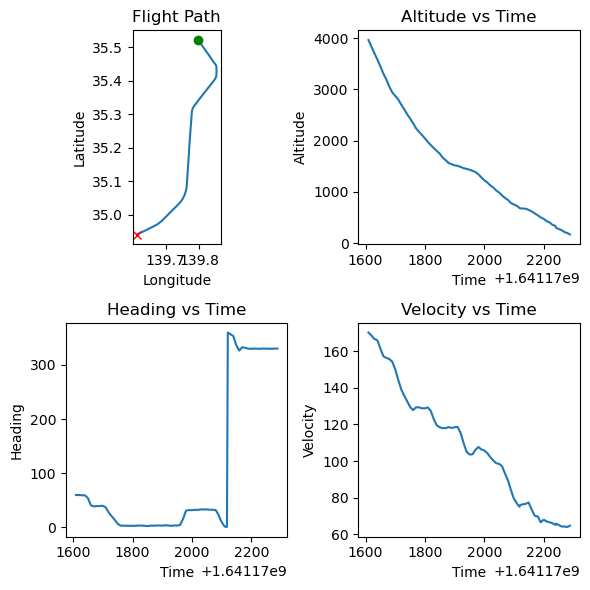

In [8]:
plot_df(df, ident)

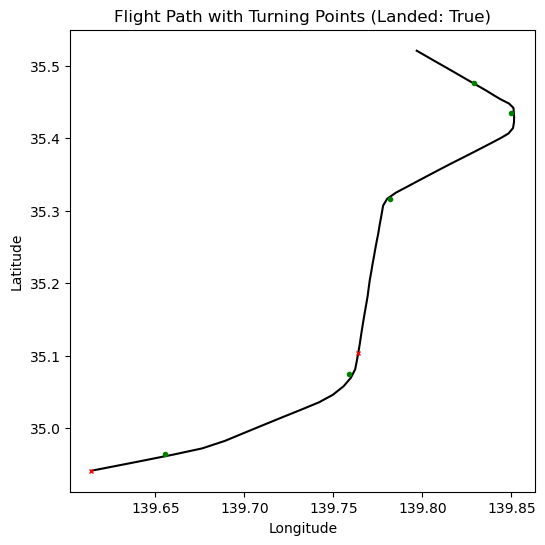

In [9]:
plot_changepoints(turning_points, df, ident)

In [10]:
turning_points

{'dp_alt': array([3962.4 , 2240.28]),
 'dp_lat': array([34.94117866, 35.10369873]),
 'dp_lon': array([139.61408615, 139.76397456]),
 'dp_time': array([1.64117161e+09, 1.64117177e+09]),
 'tp_alt': array([3602.355, 2474.595, 1375.41 ,  681.99 ,  472.44 ]),
 'tp_lat': array([34.9636052 , 35.07506018, 35.31609913, 35.43495379, 35.47569146]),
 'tp_lon': array([139.65545654, 139.75894967, 139.78158748, 139.84968865,
        139.82890028]),
 'tp_time': array([1.64117164e+09, 1.64117174e+09, 1.64117197e+09, 1.64117213e+09,
        1.64117220e+09]),
 'ident': 'JAL184_862dd8',
 'landed': True}